# Importing Libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import os
import cv2

from PIL import Image

from tensorflow import keras 
import tensorflow.keras.layers as k
from tqdm.notebook import tqdm

In [6]:
# if u will see image dimensions in paracetize one is 135*145 another checked 134*146 so in paracetized and uninfected column every image have different dimensions 
# so we should ensure united dimensions of all images 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

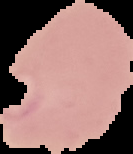

In [7]:
load_img(r"C:\Users\haris\Machine Learning\Deep learning\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png" )

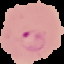

In [8]:
load_img(r"C:\Users\haris\Machine Learning\Deep learning\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png" , target_size=(64,64) )
# resize image into 64*64 pixel # red dot inflects the malaria infection

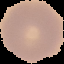

In [9]:
load_img(r"C:\Users\haris\Machine Learning\Deep learning\cell_images\Uninfected\C2NThinF_IMG_20150604_114815_cell_235.png" , target_size=(64,64) )
# no red dot ensures no infection of malaria 

In [10]:
os.environ['KERAS_BACKEND']='tensorflow' # therefore we are using tensarflow as backend 
np.random.seed(312)   # to ensure everytime we refresh we ensure results will remain same 

In [11]:
image_dir = r"C:\Users\haris\Machine Learning\Deep learning\cell_images" # image directory
size =64 
dataset2 =[]
label1 =[]


### Resizing the images in parasitized folder

In [13]:
# for resizing the parasitized one 
parasitized_img = os.listdir(image_dir+r"\Parasitized")
parasitized_img = parasitized_img[:3000] # for now taking 3000 images only to reduce load on system 
for i , img_name in enumerate(tqdm(parasitized_img)): # enumerate will add count to i whenever iteration comes 
    if(img_name.split('.')[1]=='png'):
        image_path = os.path.join(image_dir, "Parasitized", img_name) 
        image = cv2.imread(image_path) # open cv reading image in form of array as rgb therefore 3 dmensional array
        image = Image.fromarray(image,'RGB') 
        image = image.resize((size,size))

        dataset2.append(np.array(image))
        label1.append(0)
# now we had resized all the images in 64*64

  0%|          | 0/3000 [00:00<?, ?it/s]

In [14]:
#split example
'C100P61ThinF_IMG_20150918_145609_cell_147.png'.split('.')# generates 2 sections one before . and another after . 

['C100P61ThinF_IMG_20150918_145609_cell_147', 'png']

In [15]:
len(parasitized_img)

3000

In [16]:
# example of enumerates
parasitized_img[39]

'C100P61ThinF_IMG_20150918_145609_cell_147.png'

In [17]:
len(dataset2) # now this dataset have parasitized image with label 0

3000

In [18]:
len(label1)

3000

### Resizing the images in uninfected_img

In [20]:
uninfected_img = os.listdir(image_dir+r"\Uninfected")
uninfected_img = uninfected_img[:3000]
for i , img_name in enumerate(tqdm(uninfected_img)): # enumerate will add count to i whenever iteration comes 
    if(img_name.split('.')[1]=='png'):
        image_path = os.path.join(image_dir, "Uninfected", img_name) 
        image = cv2.imread(image_path) # open cv reading image in form of array as rgb therefore 3 dmensional array
        image = Image.fromarray(image,'RGB') 
        image = image.resize((size,size))

        dataset2.append(np.array(image))
        label1.append(1)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [21]:
len(uninfected_img)

3000

In [22]:
len(dataset2)

6000

In [23]:
len(label1)

6000

In [24]:
from sklearn.model_selection import train_test_split
# as 0 and 1 are categories we had created therefore we need to convert them into categorical form 
from keras.utils import to_categorical 
xtrain , xtest , ytrain , y_test = train_test_split(dataset2 , to_categorical(np.array(label1)) , test_size =0.2 , random_state =0)

# CNN Model architecture

In [26]:
INPUT_SAHPE = (size , size , 3)

inp = k.Input(shape=INPUT_SAHPE)

# first cnn layer which is input layers These conv is nothing but no of times data passed to next layer 
conv1 = k.Conv2D( 32 , kernel_size = (3,3) , activation ="relu" , padding = "same")(inp)  # here we had used 32 neurons 
# kernel size is filter which will move on image , activation = activation function
# pooling process
pool1 = k.MaxPool2D(pool_size =(2,2))(conv1) # conv1 as input here 
#normalization
norm1 = k.BatchNormalization(axis = -1)(pool1) 
drop1 = k.Dropout(rate = 0.2)(norm1)

# now input will come from previos layer second conv means data camed into hidden layer
conv2 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3),activation = "relu",padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size = (2,2))(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3) # output of last convolution

hidden1 = k.Dense(512,activation="relu")(flat) # here we used 512 neurons 
norm3   = k.BatchNormalization(axis=-1)(hidden1)
drop3   = k.Dropout(rate=0.2)(norm3)

hidden2 = k.Dense(256,activation="relu")(drop3) # 256 neurons here 
norm4   = k.BatchNormalization(axis=-1)(hidden2)
drop4   = k.Dropout(rate=0.2)(norm4)

out = k.Dense(2, activation='sigmoid')(drop4)

In [27]:
model = keras.Model(inputs = inp , outputs = out)
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics = ['accuracy']) # adam is an powerfull optimizer
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,203,778 (4.59 MB)

 Trainable params: 1,202,050 (4.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

None


In [28]:
history = model.fit(np.array(xtrain),ytrain,
                   batch_size= 64,verbose=1,epochs = 10,validation_split=0.1,shuffle=False) # verbose same function as tqdm , epoch = number of iteration
# in every iteration we can see loss decresing and accuracy increasing 

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.6242 - loss: 0.9025 - val_accuracy: 0.4854 - val_loss: 1.9490
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7860 - loss: 0.4989 - val_accuracy: 0.6229 - val_loss: 1.3996
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.8739 - loss: 0.3249 - val_accuracy: 0.8687 - val_loss: 0.4297
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.9242 - loss: 0.2246 - val_accuracy: 0.7479 - val_loss: 1.0834
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9167 - loss: 0.2195 - val_accuracy: 0.8125 - val_loss: 1.0060
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9422 - loss: 0.1702 - val_accuracy: 0.8604 - val_loss: 0.8065
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9501 - loss: 0.1361 - val_accuracy: 0.8521 - val_loss: 0.6896
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9530 - loss: 0.1256 - val_accuracy: 0

In [29]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(y_test))[1]*100))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8921 - loss: 0.7040
Test accuracy: 87.50%


In [30]:
model.save(r"C:\Users\haris\Machine Learning\Deep Learning\malaria_cell_detection.h5")

In [ ]:
!streamlit run malaria_detection_app.py
